In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import datetime

In [2]:
#Uploading the CSV file
df = pd.read_csv("C:\\Users\\lavle\\Desktop\\Open food facts.csv", encoding = 'utf8')
#Remove products which do not have any product code(key field)
df  = df[df.code.isnull() == False]
df.isnull().sum()
df.head()

C:\Users\lavle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087.0,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[['code',
'created_datetime',
'last_modified_datetime',
'product_name',
'quantity',
'packaging_tags',
'brands',
'brands_tags',
'categories_en',
'origins_tags',
'manufacturing_places_tags',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'ingredients_text',
'serving_size',
'main_category_en',
'energy_100g',
'fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'calcium_100g',
'iron_100g',
'carbon-footprint_100g']]
df.shape

(356001, 26)

In [5]:
df_nutri = df[['product_name',
'quantity',
'categories_en',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'main_category_en',
'energy_100g',
'fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'calcium_100g',
'iron_100g',]]
df_nutri.shape

(356001, 15)

In [10]:
df_nutri = df_nutri[df_nutri['countries_en'].isnull()==False]
df2_nutri = df_nutri['countries_en'].str.split(',', expand=True).stack()
df2_nutri = pd.Series.to_frame(df2_nutri)
df2_nutri.columns = ['country']
df2_nutri.head()

,,country
0,0,France
1,0,United States
2,0,United States
3,0,United States
4,0,United States


In [11]:
df_nutri, df2_nutri = df_nutri.align(df2_nutri, level=0, join='outer')
df_nutri.head()

,,calcium_100g,carbohydrates_100g,categories_en,countries_en,country,energy_100g,fat_100g,fiber_100g,first_packaging_code_geo,iron_100g,main_category_en,product_name,proteins_100g,purchase_places,quantity,sugars_100g
0,0,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Farine de blÃ© noir,NaN,NaN,1kg,NaN
1,0,0.000,64.29,NaN,United States,NaN,2243.0,28.57,3.6,NaN,0.00129,NaN,Banana Chips Sweetened (Whole),3.57,NaN,NaN,14.29
2,0,0.071,60.71,NaN,United States,NaN,1941.0,17.86,7.1,NaN,0.00129,NaN,Peanuts,17.86,NaN,NaN,17.86
3,0,0.143,17.86,NaN,United States,NaN,2540.0,57.14,7.1,NaN,0.00514,NaN,Organic Salted Nut Mix,17.86,NaN,NaN,3.57
4,0,NaN,77.14,NaN,United States,NaN,1552.0,1.43,5.7,NaN,NaN,NaN,Organic Polenta,8.57,NaN,NaN,NaN


In [13]:
df_nutri['country'] = df2_nutri['country']
del df_nutri['countries_en']

In [14]:
df_nutri.head(2)

,,calcium_100g,carbohydrates_100g,categories_en,country,energy_100g,fat_100g,fiber_100g,first_packaging_code_geo,iron_100g,main_category_en,product_name,proteins_100g,purchase_places,quantity,sugars_100g
0,0,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,Farine de blÃ© noir,NaN,NaN,1kg,NaN
1,0,0.0,64.29,NaN,United States,2243.0,28.57,3.6,NaN,0.00129,NaN,Banana Chips Sweetened (Whole),3.57,NaN,NaN,14.29


In [15]:
df_nutri.reset_index(drop=True, inplace=True)

In [16]:
df_danish = df_nutri[df_nutri['country'].isin(['Denmark'])]
df_danish.shape

(434, 15)

In [17]:
df_swedish = df_nutri[df_nutri['country'].isin(['Sweden'])]
df_norwegian = df_nutri[df_nutri['country'].isin(['Norway'])]
df_uk = df_nutri[df_nutri['country'].isin(['United Kingdom'])]
df_holland = df_nutri[df_nutri['country'].isin(['Holland'])]
df_german = df_nutri[df_nutri['country'].isin(['Germany'])]
df_french = df_nutri[df_nutri['country'].isin(['France'])]
df_suisse = df_nutri[df_nutri['country'].isin(['Switzerland'])]
df_belgium = df_nutri[df_nutri['country'].isin(['Belgium'])]
df_port =df_nutri[df_nutri['country'].isin(['Portugal'])]
df_greek = df_nutri[df_nutri['country'].isin(['Greece'])]
df_ital = df_nutri[df_nutri['country'].isin(['Italy'])]
df_croatia = df_nutri[df_nutri['country'].isin(['Croatia'])]
df_albania = df_nutri[df_nutri['country'].isin(['Albania'])]
df_spain = df_nutri[df_nutri['country'].isin(['Spain'])]

North Region

In [34]:
df_fat_north = [df_danish['fat_100g'], df_swedish['fat_100g'], df_norwegian['fat_100g'], df_uk['fat_100g']]
df_fat_north = pd.concat(df_fat_north)

In [35]:
df_fat_north.notnull().sum()

2826

In [36]:
df_fat_north.isnull().sum()

4144

In [38]:
df_protein_north = [df_danish['proteins_100g'], df_swedish['proteins_100g'], df_norwegian['proteins_100g'], df_uk['proteins_100g']]
df_protein_north = pd.concat(df_protein_north)
df_protein_north.isnull().sum()

4086

In [39]:
df_protein_north.notnull().sum()

2884

In [40]:
df_carbs_north = [df_danish['carbohydrates_100g'], df_swedish['carbohydrates_100g'], df_norwegian['carbohydrates_100g'], df_uk['carbohydrates_100g']]
df_carbs_north = pd.concat(df_carbs_north)
df_carbs_north.isnull().sum()

4154

In [41]:
df_carbs_north.notnull().sum()

2816

In [42]:
df_sugar_north = [df_danish['sugars_100g'], df_swedish['sugars_100g'], df_norwegian['sugars_100g'], df_uk['sugars_100g']]
df_sugar_north = pd.concat(df_sugar_north)
df_sugar_north.isnull().sum()

4150

In [43]:
df_sugar_north.notnull().sum()

2820

In [44]:
df_fiber_north = [df_danish['fiber_100g'], df_swedish['fiber_100g'], df_norwegian['fiber_100g'], df_uk['fiber_100g']]
df_fiber_north = pd.concat(df_fiber_north)
df_fiber_north.isnull().sum()

4904

In [45]:
df_fiber_north.notnull().sum()

2066

Central Region

In [55]:
df_fat_cent = [df_holland['fat_100g'], df_german['fat_100g'], df_french['fat_100g'], df_suisse['fat_100g'], df_belgium['fat_100g']]
df_fat_cent = pd.concat(df_fat_cent)
df_protein_cent = [df_holland['proteins_100g'], df_german['proteins_100g'], df_french['proteins_100g'], df_suisse['proteins_100g'], df_belgium['proteins_100g']]
df_protein_cent = pd.concat(df_protein_cent)
df_carbs_cent = [df_holland['carbohydrates_100g'], df_german['carbohydrates_100g'], df_french['carbohydrates_100g'], df_suisse['carbohydrates_100g'], df_belgium['carbohydrates_100g']]
df_carbs_cent = pd.concat(df_carbs_cent)
df_sugar_cent = [df_holland['sugars_100g'], df_german['sugars_100g'], df_french['sugars_100g'], df_suisse['sugars_100g'], df_belgium['sugars_100g']]
df_sugar_cent = pd.concat(df_sugar_cent)
df_fiber_cent = [df_holland['fiber_100g'], df_german['fiber_100g'], df_french['fiber_100g'], df_suisse['fiber_100g'], df_belgium['fiber_100g']]
df_fiber_cent = pd.concat(df_fiber_cent)

South Region

In [56]:
df_fat_south = [df_port['fat_100g'], df_greek['fat_100g'], df_ital['fat_100g'], df_croatia['fat_100g'], df_albania['fat_100g'], df_spain['fat_100g']]
df_fat_south = pd.concat(df_fat_south)
df_protein_south = [df_port['proteins_100g'], df_greek['proteins_100g'], df_ital['proteins_100g'], df_croatia['proteins_100g'], df_albania['proteins_100g'], df_spain['proteins_100g']]
df_protein_south = pd.concat(df_protein_south)
df_carbs_south = [df_port['carbohydrates_100g'], df_greek['carbohydrates_100g'], df_ital['carbohydrates_100g'], df_croatia['carbohydrates_100g'], df_albania['carbohydrates_100g'], df_spain['carbohydrates_100g']]
df_carbs_south = pd.concat(df_carbs_south)
df_sugar_south = [df_port['sugars_100g'], df_greek['sugars_100g'], df_ital['sugars_100g'], df_croatia['sugars_100g'], df_albania['sugars_100g'], df_spain['sugars_100g']]
df_sugar_south = pd.concat(df_sugar_south)
df_fiber_south = [df_port['fiber_100g'], df_greek['fiber_100g'], df_ital['fiber_100g'], df_croatia['fiber_100g'], df_albania['fiber_100g'], df_spain['fiber_100g']]
df_fiber_south = pd.concat(df_fiber_south)

In [59]:
df_final = pd.DataFrame(['North Europe', np.mean(df_fat_north), np.mean(df_protein_north), np.mean(df_carbs_north), np.mean(df_sugar_north), np.mean(df_fiber_north)]).T
df_final = pd.concat([df_final, pd.DataFrame(['Central Europe', np.mean(df_fat_cent), np.mean(df_protein_cent), np.mean(df_carbs_cent), np.mean(df_sugar_cent), np.mean(df_fiber_cent)]).T], ignore_index = True)
df_final = pd.concat([df_final, pd.DataFrame(['South Europe', np.mean(df_fat_south), np.mean(df_protein_south), np.mean(df_carbs_south), np.mean(df_sugar_south), np.mean(df_fiber_south)]).T], ignore_index = True)
df_final

,0,1,2,3,4,5
0,North Europe,13.8176,7.16152,27.9537,15.1467,2.37926
1,Central Europe,13.49,7.70728,28.1119,13.7708,1.09662e+06
2,South Europe,12.9815,6.34936,29.6674,13.0517,3.87824


In [60]:
df_final.columns = ['Region', 'Fat', 'Protein', 'Carbohydrates', 'Sugar', 'Fiber']
df_final

,Region,Fat,Protein,Carbohydrates,Sugar,Fiber
0,North Europe,13.8176,7.16152,27.9537,15.1467,2.37926
1,Central Europe,13.49,7.70728,28.1119,13.7708,1.09662e+06
2,South Europe,12.9815,6.34936,29.6674,13.0517,3.87824


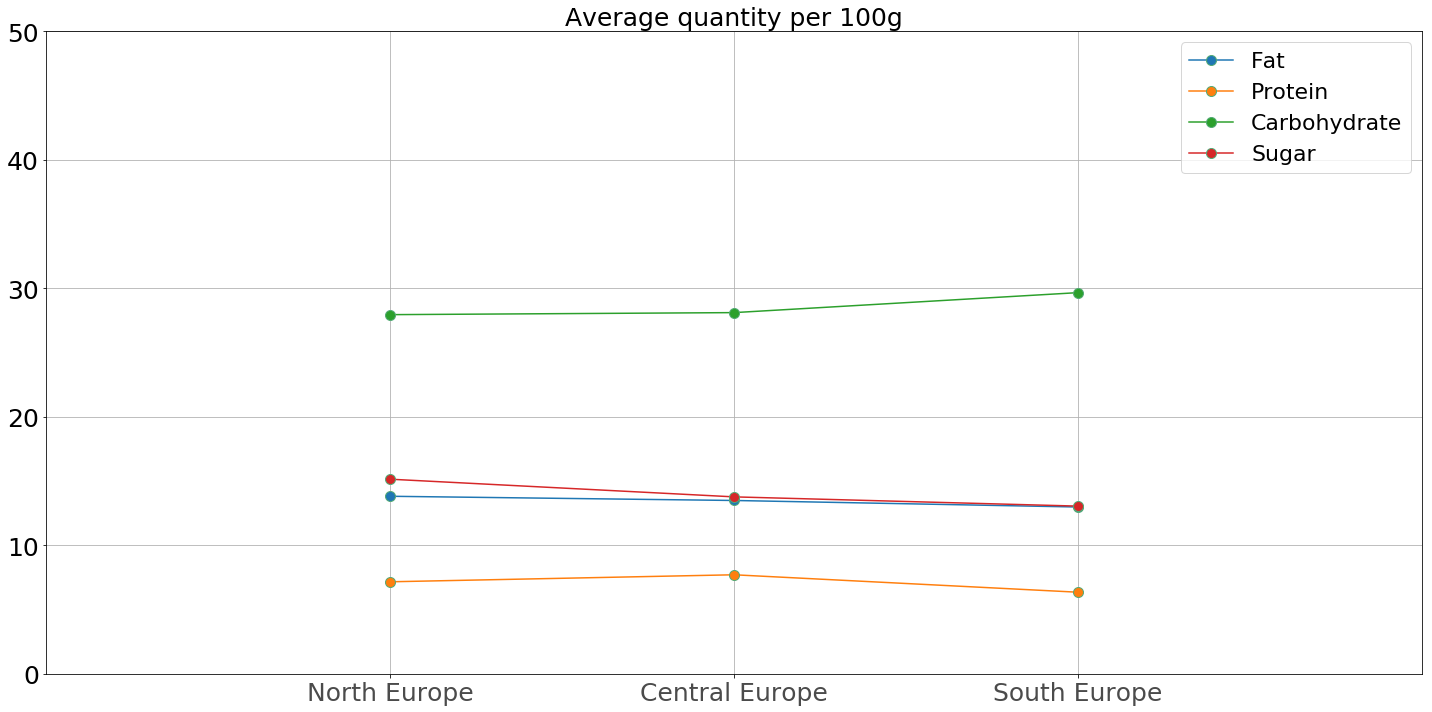

In [79]:
#plot
fig, ax = plt.subplots(figsize=(20,10))
#index
pos = np.arange(3)
#plot title
ax.set_title('Average quantity per 100g', fontsize=25)

#auxiliary var for the colors in rgb format
const = float(255)
ax.plot(pos, df_final['Fat'],  marker='o', markeredgecolor=(84/const, 170/const, 118/const), label='Fat',markersize=10)
ax.plot(pos, df_final['Protein'], marker='o',markeredgecolor=(84/const, 170/const, 118/const), label='Protein',markersize=10)
ax.plot(pos, df_final['Carbohydrates'], marker='o',markeredgecolor=(84/const, 170/const, 118/const), label='Carbohydrate',markersize=10)
ax.plot(pos, df_final['Sugar'], marker='o',markeredgecolor=(84/const, 170/const, 118/const), label='Sugar',markersize=10)
#ax.plot(pos, df_final['Fiber'], marker='o',markeredgecolor=(84/const, 170/const, 118/const), label='Fiber',markersize=10)

#plot limits
ax.set_ylim(0,50)
ax.set_xlim(-1,3)
#x ticks adjustment
ax.set_xticks(pos)
ax.set_xticklabels(df_final['Region'], alpha=0.7, fontsize=25)

ticks = ['0','10','20','30','40','50']
ax.set_yticklabels(labels = ticks, fontsize=25)
#legend
plt.legend(loc='best',prop={'size':22})
plt.tight_layout()
plt.grid()
plt.show()